Heatmap with HOMER discovery motif analysis in kmeans=10 clusters classification of dynamics of chromatin opening (ATAC data) during reprogramming.
This time, I took the opened regions that are opened in the different samples = biallelic (between 0.15 and 0.85).


In [1]:
library(readr)
library(DiffBind)
library(DESeq2)
library(dplyr)
library(tidyr)
library(ggplot2)
library(viridis)
library(ggridges)
library(readxl)
library(pheatmap)
library(RColorBrewer)

Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors

Atta

In [2]:
setwd("/ddn1/vol1/staging/leuven/stg_00041/Irene/homer_results/opened_in_timepoint/")

In [3]:
day8 <- read_delim("day8_homer.csv",";", escape_double = FALSE, trim_ws = TRUE )
day0 <- read_delim("day0_homer.csv",";", escape_double = FALSE, trim_ws = TRUE )
day9 <- read_delim("day9_homer.csv",";", escape_double = FALSE, trim_ws = TRUE )
day10 <- read_delim("day10_homer.csv",";", escape_double = FALSE, trim_ws = TRUE )
day12 <- read_delim("day12_homer.csv",";", escape_double = FALSE, trim_ws = TRUE )

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_character(),
  day8 = col_double()
)
Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_character(),
  day0 = col_double()
)
Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_character(),
  day9 = col_double()
)
Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_character(),
  day10 = col_double()
)
Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_character(),
  day12 = col_double()
)


In [4]:
iPSCs <- read_delim("iPSCs_homer.csv",";", escape_double = FALSE, trim_ws = TRUE )

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_character(),
  iPSCs = col_double()
)


In [5]:
head(iPSCs)


X1,iPSCs
CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,16.99
BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,19.18
Sp2(Zf)/HEK293-Sp2.eGFP-ChIP-Seq(Encode)/Homer,58.08
KLF1(Zf)/HUDEP2-KLF1-CutnRun(GSE136251)/Homer,43.29
Sp5(Zf)/mES-Sp5.Flag-ChIP-Seq(GSE72989)/Homer,47.53
Jun-AP1(bZIP)/K562-cJun-ChIP-Seq(GSE31477)/Homer,9.59


In [6]:
day8_df <- as.data.frame(day8)
day0_df <- as.data.frame(day0)
day9_df <- as.data.frame(day9)
day10_df <- as.data.frame(day10)
day12_df <- as.data.frame(day12)

In [7]:
iPSCs_df <- as.data.frame(iPSCs)

In [8]:
iPSCs_df2 <- data.frame(iPSCs_df, row.names = 1)

In [9]:
head(iPSCs_df2)

,iPSCs
CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,16.99
BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,19.18
Sp2(Zf)/HEK293-Sp2.eGFP-ChIP-Seq(Encode)/Homer,58.08
KLF1(Zf)/HUDEP2-KLF1-CutnRun(GSE136251)/Homer,43.29
Sp5(Zf)/mES-Sp5.Flag-ChIP-Seq(GSE72989)/Homer,47.53
Jun-AP1(bZIP)/K562-cJun-ChIP-Seq(GSE31477)/Homer,9.59


In [10]:
day8_df2 <- data.frame(day8_df, row.names = 1)
day0_df2 <- data.frame(day0_df, row.names = 1)
day10_df2 <- data.frame(day10_df, row.names = 1)
day12_df2 <- data.frame(day12_df, row.names = 1)
day9_df2 <- data.frame(day9_df, row.names = 1)

In [11]:
head(day8_df2)
head(day0_df2)
head(day10_df2)
head(day12_df2)
head(day9_df2)

,day8
CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,25.11
BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,24.68
Jun-AP1(bZIP)/K562-cJun-ChIP-Seq(GSE31477)/Homer,11.06
Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer,12.77
Fos(bZIP)/TSC-Fos-ChIP-Seq(GSE110950)/Homer,18.72
Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer,16.17


,day0
CTCF(Zf)/CD4+CTCF-ChIP-Seq(Barski_et_al.)/Homer,33.94
BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,33.94
CTCF-SatelliteElement(Zf?)/CD4+CTCF-ChIP-Seq(Barski_et_al.)/Homer,5.50
"Oct4:Sox17(POU,Homeobox,HMG)/F9-Sox17-ChIP-Seq(GSE44553)/Homer",10.09
Sox21(HMG)/ESC-SOX21-ChIP-Seq(GSE110505)/Homer,56.88
Sox10(HMG)/SciaticNerve-Sox3-ChIP-Seq(GSE35132)/Homer,49.54


,day10
CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,24.79
BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,25.07
CTCF-SatelliteElement(Zf?)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,3.42
KLF14(Zf)/HEK293-KLF14.GFP-ChIP-Seq(GSE58341)/Homer,59.83
TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer,33.05
Jun-AP1(bZIP)/K562-cJun-ChIP-Seq(GSE31477)/Homer,9.40


,day12
CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,17.03
BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,19.38
KLF1(Zf)/HUDEP2-KLF1-CutnRun(GSE136251)/Homer,44.20
Sp2(Zf)/HEK293-Sp2.eGFP-ChIP-Seq(Encode)/Homer,58.44
Sp5(Zf)/mES-Sp5.Flag-ChIP-Seq(GSE72989)/Homer,48.02
KLF3(Zf)/MEF-Klf3-ChIP-Seq(GSE44748)/Homer,30.10


,day9
CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,24.30
BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,26.06
CTCF-SatelliteElement(Zf?)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,3.52
TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer,34.86
TEAD1(TEAD)/HepG2-TEAD1-ChIP-Seq(Encode)/Homer,30.99
TEAD4(TEA)/Tropoblast-Tead4-ChIP-Seq(GSE37350)/Homer,27.82


In [12]:
day0_day8_df_merged <- merge(day0_df2, day8_df2, by = "row.names", all = TRUE)

In [13]:
day0_day8_df_merged

Row.names,day0,day8
AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,NA,20.85
Atf2(bZIP)/3T3L1-Atf2-ChIP-Seq(GSE56872)/Homer,11.93,NA
Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,NA,18.72
Atf7(bZIP)/3T3L1-Atf7-ChIP-Seq(GSE56872)/Homer,15.60,NA
BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,NA,19.57
BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,33.94,24.68
Bach1(bZIP)/K562-Bach1-ChIP-Seq(GSE31477)/Homer,NA,2.98
CRE(bZIP)/Promoter/Homer,NA,8.51
CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,NA,25.11
CTCF(Zf)/CD4+CTCF-ChIP-Seq(Barski_et_al.)/Homer,33.94,NA


In [14]:
day9_day10_df_merged <- merge(day9_df2, day10_df2, by = "row.names", all = TRUE)

In [15]:
day9_day10_df_merged

Row.names,day9,day10
AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,NA,18.52
Atf1(bZIP)/K562-ATF1-ChIP-Seq(GSE31477)/Homer,17.61,16.24
Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,16.90,16.24
Atf7(bZIP)/3T3L1-Atf7-ChIP-Seq(GSE56872)/Homer,13.73,13.96
BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,18.31,18.52
BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,26.06,25.07
Bach1(bZIP)/K562-Bach1-ChIP-Seq(GSE31477)/Homer,3.17,3.13
Bach2(bZIP)/OCILy7-Bach2-ChIP-Seq(GSE44420)/Homer,NA,5.98
CRE(bZIP)/Promoter/Homer,9.86,9.12
CREB5(bZIP)/LNCaP-CREB5.V5-ChIP-Seq(GSE137775)/Homer,NA,9.69


In [16]:
day0_day8_df_merged2 <- data.frame(day0_day8_df_merged, row.names = 1)
day9_day10_df_merged2 <- data.frame(day9_day10_df_merged, row.names = 1)

In [17]:
day0_day8_day9_day10_df_merged <- merge(day0_day8_df_merged2, day9_day10_df_merged2, by = "row.names", all = TRUE)

In [18]:
head(day0_day8_day9_day10_df_merged)

Row.names,day0,day8,day9,day10
AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,NA,20.85,NA,18.52
Atf1(bZIP)/K562-ATF1-ChIP-Seq(GSE31477)/Homer,NA,NA,17.61,16.24
Atf2(bZIP)/3T3L1-Atf2-ChIP-Seq(GSE56872)/Homer,11.93,NA,NA,NA
Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,NA,18.72,16.90,16.24
Atf7(bZIP)/3T3L1-Atf7-ChIP-Seq(GSE56872)/Homer,15.60,NA,13.73,13.96
BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,NA,19.57,18.31,18.52


In [19]:
day0_day8_day9_day10_df_merged <- data.frame(day0_day8_day9_day10_df_merged, row.names = 1)

In [20]:
head(day0_day8_day9_day10_df_merged)

,day0,day8,day9,day10
AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,NA,20.85,NA,18.52
Atf1(bZIP)/K562-ATF1-ChIP-Seq(GSE31477)/Homer,NA,NA,17.61,16.24
Atf2(bZIP)/3T3L1-Atf2-ChIP-Seq(GSE56872)/Homer,11.93,NA,NA,NA
Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,NA,18.72,16.90,16.24
Atf7(bZIP)/3T3L1-Atf7-ChIP-Seq(GSE56872)/Homer,15.60,NA,13.73,13.96
BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,NA,19.57,18.31,18.52


In [21]:
day0_day8_day9_day10_day12_df_merged <- merge(day0_day8_day9_day10_df_merged, day12_df2, by = "row.names", all = TRUE)

In [22]:
head(day0_day8_day9_day10_day12_df_merged)

Row.names,day0,day8,day9,day10,day12
AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,NA,20.85,NA,18.52,17.47
Atf1(bZIP)/K562-ATF1-ChIP-Seq(GSE31477)/Homer,NA,NA,17.61,16.24,16.59
Atf2(bZIP)/3T3L1-Atf2-ChIP-Seq(GSE56872)/Homer,11.93,NA,NA,NA,NA
Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,NA,18.72,16.90,16.24,16.15
Atf7(bZIP)/3T3L1-Atf7-ChIP-Seq(GSE56872)/Homer,15.60,NA,13.73,13.96,12.04
BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,NA,19.57,18.31,18.52,16.74


In [23]:
day0_day8_day9_day10_day12_df_merged <- data.frame(day0_day8_day9_day10_day12_df_merged, row.names = 1)

In [24]:
head(day0_day8_day9_day10_day12_df_merged)

,day0,day8,day9,day10,day12
AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,NA,20.85,NA,18.52,17.47
Atf1(bZIP)/K562-ATF1-ChIP-Seq(GSE31477)/Homer,NA,NA,17.61,16.24,16.59
Atf2(bZIP)/3T3L1-Atf2-ChIP-Seq(GSE56872)/Homer,11.93,NA,NA,NA,NA
Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,NA,18.72,16.90,16.24,16.15
Atf7(bZIP)/3T3L1-Atf7-ChIP-Seq(GSE56872)/Homer,15.60,NA,13.73,13.96,12.04
BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,NA,19.57,18.31,18.52,16.74


In [25]:
all_merged2 <- merge(day0_day8_day9_day10_day12_df_merged, iPSCs_df2, by = "row.names", all = TRUE)

In [26]:
head(all_merged2)

Row.names,day0,day8,day9,day10,day12,iPSCs
AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,NA,20.85,NA,18.52,17.47,18.08
Atf1(bZIP)/K562-ATF1-ChIP-Seq(GSE31477)/Homer,NA,NA,17.61,16.24,16.59,16.85
Atf2(bZIP)/3T3L1-Atf2-ChIP-Seq(GSE56872)/Homer,11.93,NA,NA,NA,NA,NA
Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,NA,18.72,16.90,16.24,16.15,16.85
Atf7(bZIP)/3T3L1-Atf7-ChIP-Seq(GSE56872)/Homer,15.60,NA,13.73,13.96,12.04,12.88
BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,NA,19.57,18.31,18.52,16.74,17.26


In [27]:
all_merged2[is.na(all_merged2)] <- 0 

In [28]:
head(all_merged2)

Row.names,day0,day8,day9,day10,day12,iPSCs
AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,0.00,20.85,0.00,18.52,17.47,18.08
Atf1(bZIP)/K562-ATF1-ChIP-Seq(GSE31477)/Homer,0.00,0.00,17.61,16.24,16.59,16.85
Atf2(bZIP)/3T3L1-Atf2-ChIP-Seq(GSE56872)/Homer,11.93,0.00,0.00,0.00,0.00,0.00
Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,0.00,18.72,16.90,16.24,16.15,16.85
Atf7(bZIP)/3T3L1-Atf7-ChIP-Seq(GSE56872)/Homer,15.60,0.00,13.73,13.96,12.04,12.88
BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,0.00,19.57,18.31,18.52,16.74,17.26


In [29]:
all_merged2 <- data.frame(all_merged2, row.names = 1)

In [30]:
head(all_merged2)

,day0,day8,day9,day10,day12,iPSCs
AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,0.00,20.85,0.00,18.52,17.47,18.08
Atf1(bZIP)/K562-ATF1-ChIP-Seq(GSE31477)/Homer,0.00,0.00,17.61,16.24,16.59,16.85
Atf2(bZIP)/3T3L1-Atf2-ChIP-Seq(GSE56872)/Homer,11.93,0.00,0.00,0.00,0.00,0.00
Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,0.00,18.72,16.90,16.24,16.15,16.85
Atf7(bZIP)/3T3L1-Atf7-ChIP-Seq(GSE56872)/Homer,15.60,0.00,13.73,13.96,12.04,12.88
BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,0.00,19.57,18.31,18.52,16.74,17.26


In [40]:
write.table(all_merged2, "all_merged2.txt", sep="\t")

In [11]:
all_merged2 <-read_delim('heatmap_ordered_new.csv',delim=';')

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_character(),
  iPSCs = col_double(),
  day12 = col_double(),
  day10 = col_double(),
  day9 = col_double(),
  day8 = col_double(),
  day0 = col_double()
)


In [3]:
auto <-read_delim('auto_motifs_filtered_ordered.csv',delim=';')

Parsed with column specification:
cols(
  motif = col_character(),
  day0 = col_double(),
  day8 = col_double(),
  day9 = col_double(),
  day10 = col_double(),
  day12 = col_double(),
  iPSCs = col_double()
)


In [4]:
head(auto)

motif,day0,day8,day9,day10,day12,iPSCs
CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,0.00,0.00,0.00,0.00,0.00,0.00
BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,10.38,10.32,0.00,11.15,12.93,12.82
KLF14(Zf)/HEK293-KLF14.GFP-ChIP-Seq(GSE58341)/Homer,58.60,76.28,77.74,78.21,81.57,76.60
KLF1(Zf)/HUDEP2-KLF1-CutnRun(GSE136251)/Homer,39.97,60.76,62.98,62.43,65.13,57.53
KLF3(Zf)/MEF-Klf3-ChIP-Seq(GSE44748)/Homer,26.14,42.00,43.93,43.35,45.93,39.25
KLF5(Zf)/LoVo-KLF5-ChIP-Seq(GSE49402)/Homer,49.40,70.44,71.98,71.16,71.98,65.81


In [17]:
head(all_merged2)

,iPSCs,day12,day10,day9,day8,day0
CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,16.99,17.03,24.79,24.30,25.11,33.94
BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,19.18,19.38,25.07,26.06,24.68,33.94
KLF14(Zf)/HEK293-KLF14.GFP-ChIP-Seq(GSE58341)/Homer,61.78,62.56,59.83,56.69,56.17,0.00
KLF1(Zf)/HUDEP2-KLF1-CutnRun(GSE136251)/Homer,43.29,44.20,38.75,34.51,31.91,0.00
KLF3(Zf)/MEF-Klf3-ChIP-Seq(GSE44748)/Homer,29.32,30.10,25.93,23.24,0.00,0.00
KLF5(Zf)/LoVo-KLF5-ChIP-Seq(GSE49402)/Homer,49.18,49.78,43.59,0.00,0.00,0.00


In [ ]:
nrow()

In [13]:
all_merged2 <- data.frame(all_merged2, row.names = 1)

In [5]:
auto <- data.frame(auto, row.names = 1)
all_merged2 <- data.frame(all_merged2, row.names = 1)

In [19]:
auto_matrix <- as.matrix(auto)
X_matrix <- as.matrix(all_merged2)

In [7]:
head(auto_matrix)

,day0,day8,day9,day10,day12,iPSCs
CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,0.00,0.00,0.00,0.00,0.00,0.00
BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,10.38,10.32,0.00,11.15,12.93,12.82
KLF14(Zf)/HEK293-KLF14.GFP-ChIP-Seq(GSE58341)/Homer,58.60,76.28,77.74,78.21,81.57,76.60
KLF1(Zf)/HUDEP2-KLF1-CutnRun(GSE136251)/Homer,39.97,60.76,62.98,62.43,65.13,57.53
KLF3(Zf)/MEF-Klf3-ChIP-Seq(GSE44748)/Homer,26.14,42.00,43.93,43.35,45.93,39.25
KLF5(Zf)/LoVo-KLF5-ChIP-Seq(GSE49402)/Homer,49.40,70.44,71.98,71.16,71.98,65.81


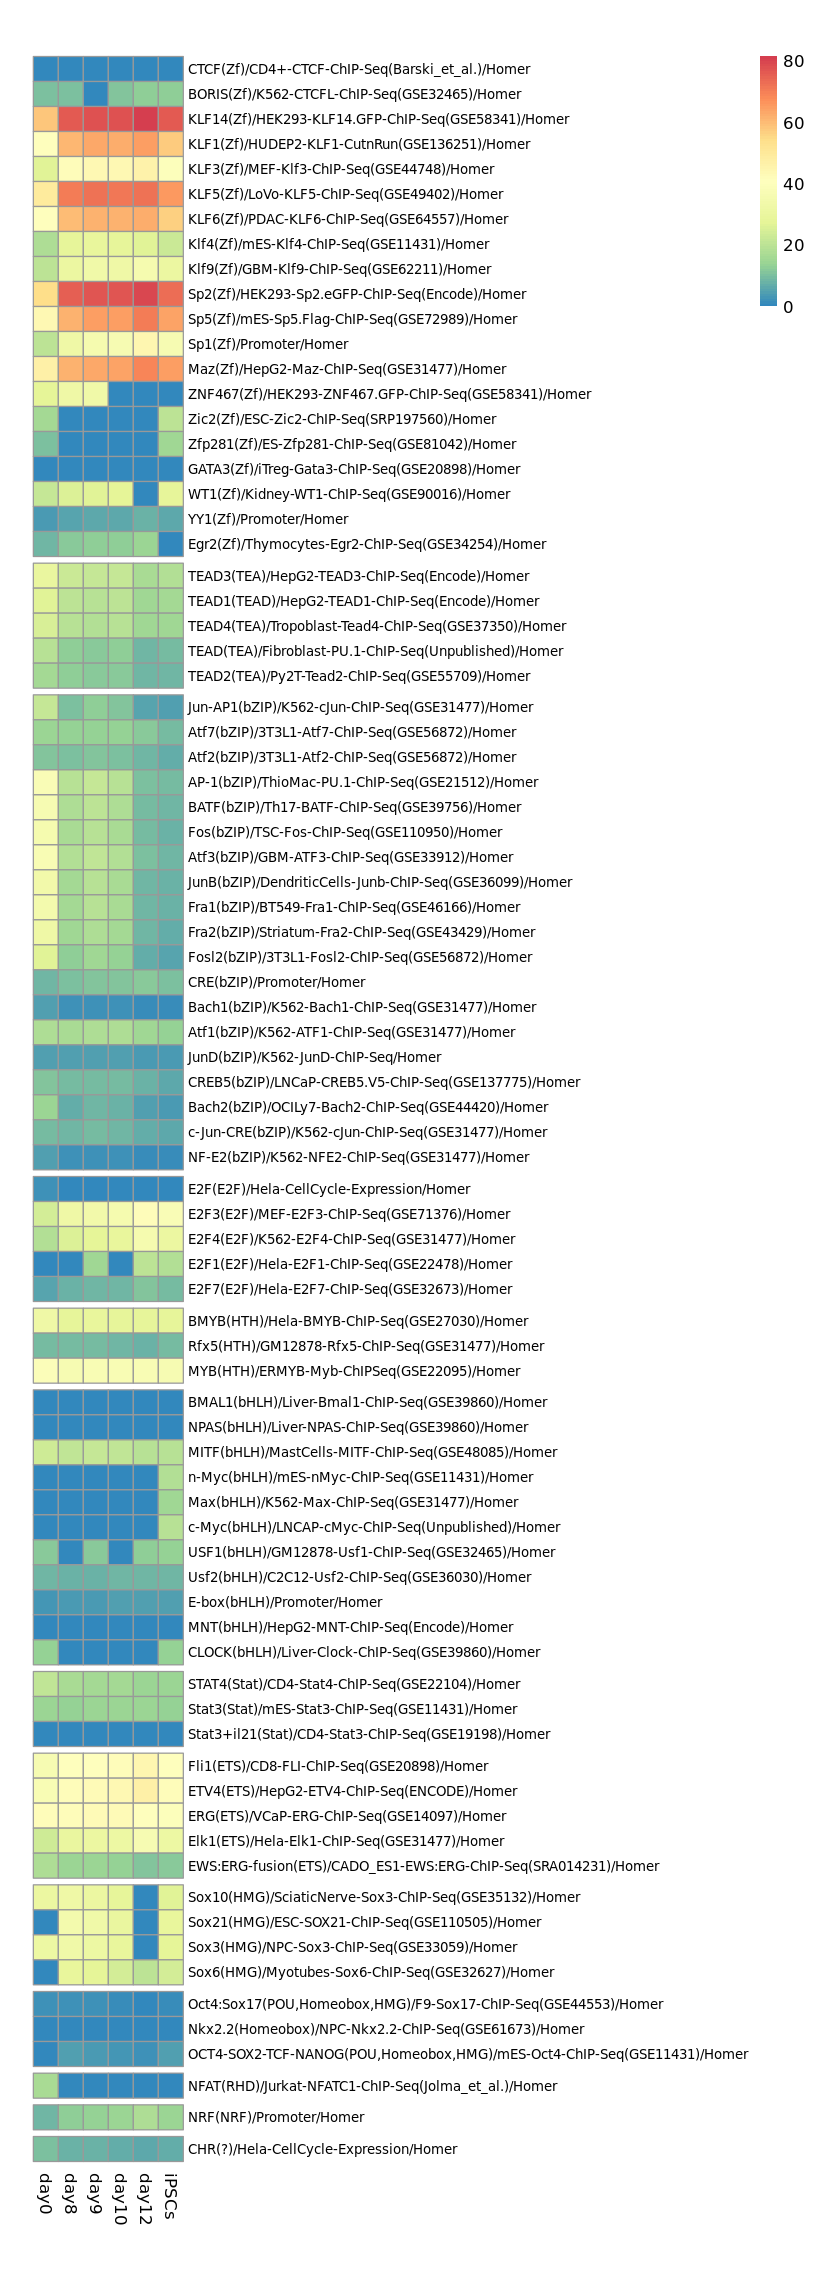

In [29]:
options(repr.plot.width=7, repr.plot.height=19)
pheatmap(auto_matrix, 
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "Spectral")))(100),
         cluster_cols = FALSE, 
         cluster_rows = FALSE, 
         cellheight = 15, 
         cellwidth = 15, 
         border_color = "grey60", 
        gaps_row = c(20,25,44,49,52,63,66,71,75,78,79,80,81 ),
         fontsize_row = 8,
        angle_col = 270)
        
      # filename = "MOTIFS_HOMER_heatmap_ordered_AUTOSOMES.pdf")

In [27]:
breaksList = seq(1, 80, by = 1)

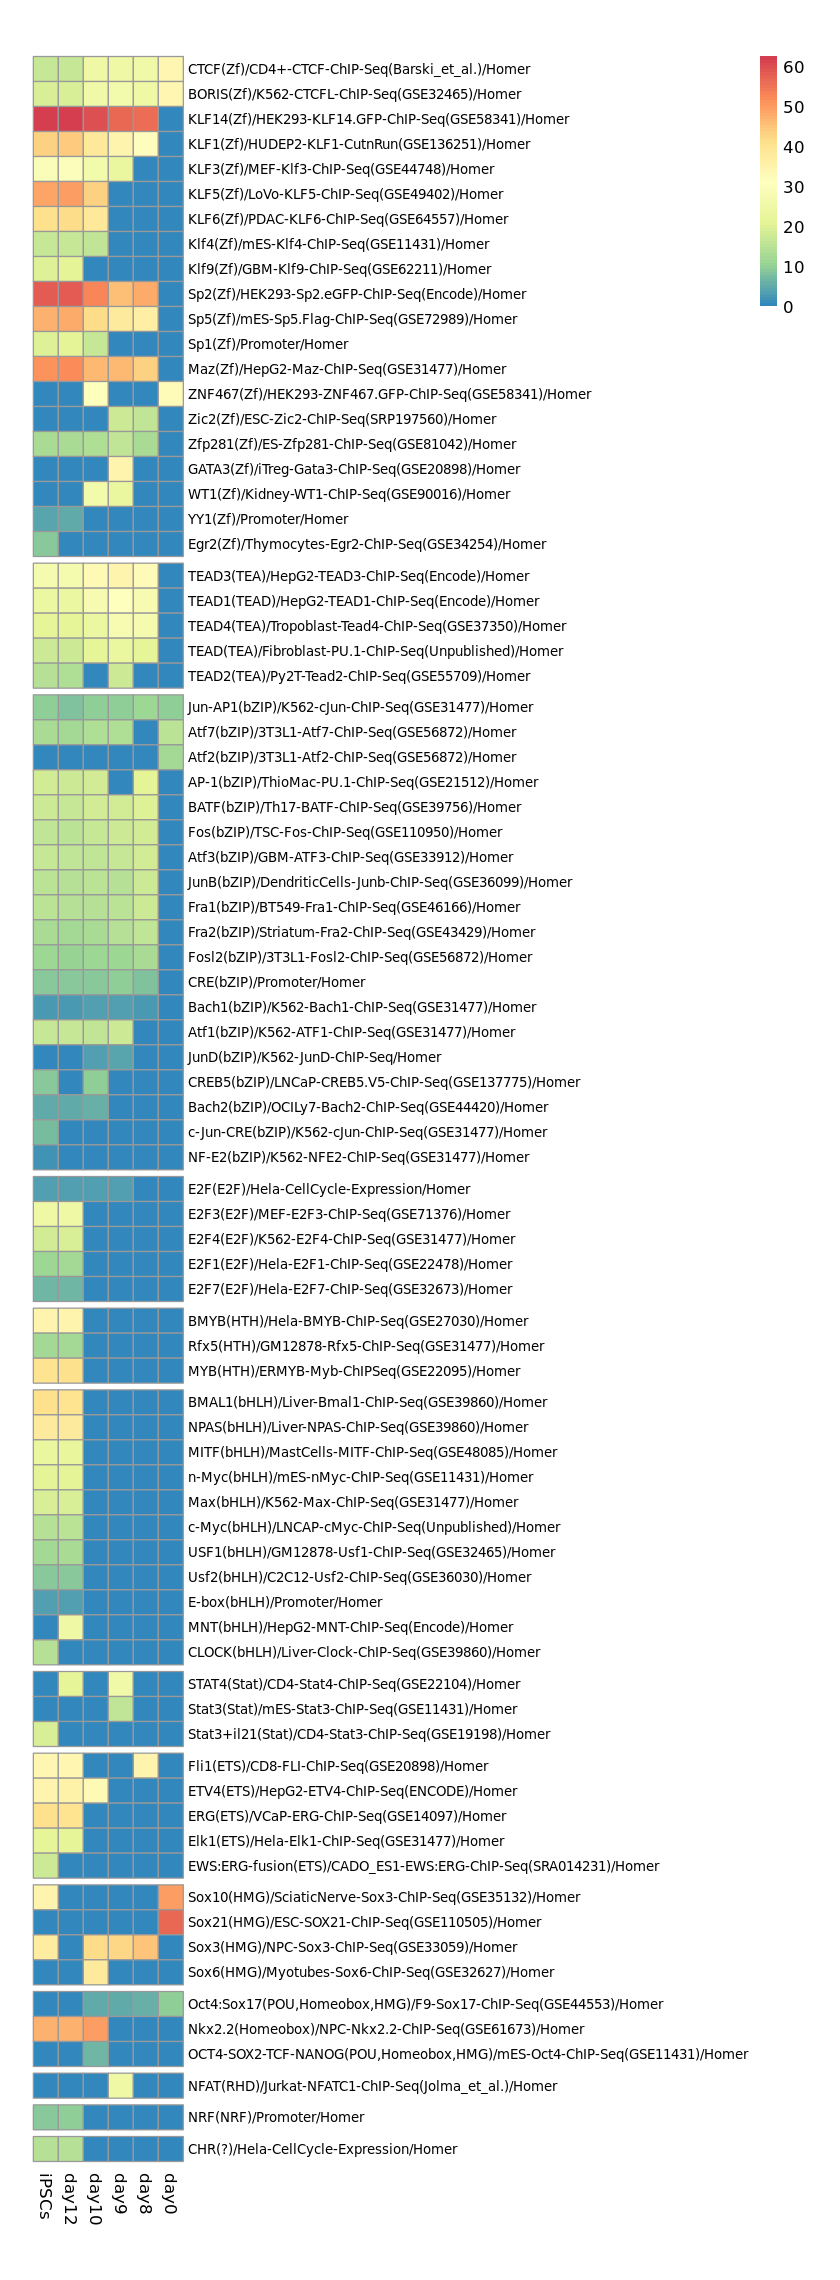

In [28]:
options(repr.plot.width=7, repr.plot.height=19)
pheatmap(all_merged2, 
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "Spectral")))(length(breaksList)),
         cluster_cols = FALSE, 
         cluster_rows = FALSE, 
         cellheight = 15, 
         cellwidth = 15, 
         border_color = "grey60", 
        gaps_row = c(20,25,44,49,52,63,66,71,75,78,79,80,81 ),
         fontsize_row = 8,
        angle_col = 270)
        
      # filename = "MOTIFS_HOMER_heatmap_ordered_AUTOSOMES.pdf")